In [1]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "../notebook/predictor_result/TACRED_predictor.jsonl"
id2name = "../data/id2name.json"

NUMBER_OF_SAMPELS = 100

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)


In [2]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [4]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
#     print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [5]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [7]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
wrong_prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        if data['answer'] == "wrong":
            total_wrong +=1
            print("wrong example number: ",total_wrong,  "example number: ", ex_index)
            show_set(data)
            print()
            wrong_prediction_which_rel[the_gold_rel] = wrong_prediction_which_rel.get(the_gold_rel,Counter())
            wrong_prediction_which_rel[the_gold_rel].update([pred_rel])
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  1 example number:  6
per:parents	 On the Net : Rounding out the top 10 : Sam Alexis Woods , daughter of Tiger Woods and his wife , Elin ; Cruz Beckham , son of David and Victoria Beckham ; Matilda Rose Ledger , daughter of Michelle Williams and the late Heath Ledger ; David Banda , son of Madonna and Guy Ritchie ; sean preston Federline , son of britney spears and Kevin Federline ; and Sam Sheen , daughter of Denise Richards and Charlie Sheen .

org:member_of	 Football : arsenal 's six appeal too much for everton 0.00; 44.56
org:stateorprovince_of_headquarters	 But a spokesperson for the professional rodeo cowboys association , based in colorado Springs , colorado , said Wednesday she had not heard of a ban anywhere else .  0.00; 38.55
per:spouse	 President Harry S. Truman with Capt. jefferson j. deblanc and louise deblanc at a Medal of Honor ceremony in 1946 .  0.81; 50.03
per:country_of_birth	 CARACAS , Jan 10 ( Xinhua ) hugo chavez , was born on July 28 , 1954

wrong example number:  130 example number:  583
org:member_of	 On April 12 ipsco was valued at about 6.13 billion dollars on the new york stock exchange and the company last year produced about four million tonnes of steel .

per:age	 hawkins , California 's First Black Congress Member , Dies at 100 0.00; 43.93
org:parents	 hong kong disneyland recorded double-digit growth in attendance in the fiscal quarter ending late December , contributing part of the walt disney company 's quarterly earnings , the theme park 's executive vice president and managing director said Thursday .  0.94; 49.61
org:member_of	 The Boston red sox will turn to Japanese star Daisuke Matsuzaka for their starting pitcher against the Oakland Athletics on major league baseball 's opening day March 25 in Tokyo .  0.04; 46.43
per:parents	 As the case developed , sandy 's mother , denise sandy , quietly made herself a spectral but central figure , by faithfully attending pretrial hearings .  0.00; 39.42
per:stateorpr

In [22]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))
print(len(result_per_type))

0.233
1000
42


In [21]:
for k,v in result_per_type.items():
    print("acc for ", k)
    print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  org:members
total from this category: 21
0.47619047619047616
acc for  org:dissolved
total from this category: 18
0.9444444444444444
acc for  per:title
total from this category: 24
0.9583333333333334
acc for  per:date_of_death
total from this category: 26
0.8076923076923077
acc for  per:parents
total from this category: 31
0.7741935483870968
acc for  per:stateorprovince_of_death
total from this category: 27
0.7777777777777778
acc for  org:stateorprovince_of_headquarters
total from this category: 27
0.7777777777777778
acc for  per:city_of_death
total from this category: 31
0.9354838709677419
acc for  per:date_of_birth
total from this category: 31
0.9032258064516129
acc for  per:origin
total from this category: 18
0.8333333333333334
acc for  per:city_of_birth
total from this category: 24
0.7083333333333334
acc for  per:siblings
total from this category: 28
0.6428571428571429
acc for  per:country_of_death
total from this category: 21
0.6666666666666666
acc for  org:member_of
total

In [10]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [11]:
wrong_scores.mean()


53.46217437875117

In [12]:
correct_scroes.mean()


57.90822727646013

In [13]:
wrong_scores.std()


4.194282589964405

In [14]:
correct_scroes.std()


6.311382454720917

In [15]:
np.max(wrong_scores)


71.73918914794922

(array([ 7., 23., 50., 66., 53., 23.,  8.,  1.,  0.,  2.]),
 array([43.11729431, 45.9794838 , 48.84167328, 51.70386276, 54.56605225,
        57.42824173, 60.29043121, 63.1526207 , 66.01481018, 68.87699966,
        71.73918915]),
 <a list of 10 Patch objects>)

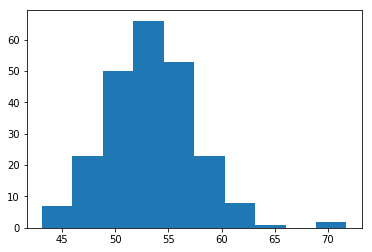

In [16]:
plt.hist(wrong_scores)



(array([0.00839598, 0.0422694 , 0.08077508, 0.05124441, 0.02171373,
        0.00781694, 0.00665888, 0.00144758, 0.00086855, 0.00086855]),
 array([44.51039886, 49.01370468, 53.5170105 , 58.02031631, 62.52362213,
        67.02692795, 71.53023376, 76.03353958, 80.5368454 , 85.04015121,
        89.54345703]),
 <a list of 10 Patch objects>)

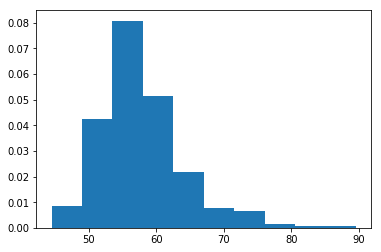

In [17]:
plt.hist(correct_scroes,density=True)

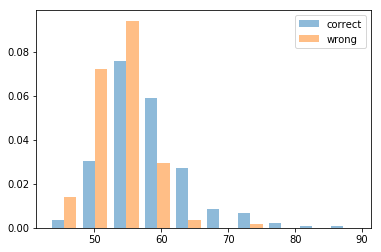

In [18]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [20]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['no_relation'][0]:
    show_set(d)
    print()
    

no_relation	 Like goldwater , he says Americans have forgotten how radical the current political mainstream actually is .

per:cause_of_death	 She died in December of lung cancer , and her grandson is seeking to fill out the rest of her sixth term , which expires at year 's end . 0.06; 44.42
org:political/religious_affiliation	 Philippine officials have tried to avoid antagonizing the mnlf , which has hundreds of armed men on Jolo , and complicating a U.S.-backed massive offensive against the muslim extremist Abu Sayyaf group and Indonesian militants , who hide in forests near mnlf strongholds .  0.00; 41.13
no_relation	 Global stock markets soared on Monday after the EU and imf agreed a near one - trillion-dollar rescue package for the eurozone , stemming a crisis that threatened to derail the global economic recovery .  0.14; 45.30
per:siblings	 she also mentioned working with R&B crooner Bilal , who previously worked with her sister beyonce on the Jimmy Jam & Terry Lewis produced ``

In [377]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [378]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

member of:	 52.39 +- 4.81 ; 70.68%
crosses:	 57.70 +- 1.81 ; 96.08%
part of:	 49.53 +- 4.92 ; 45.32%
mother:	 57.80 +- 3.45 ; 93.34%
child:	 57.03 +- 3.17 ; 91.83%
main subject:	 51.97 +- 5.47 ; 76.88%
military rank:	 56.74 +- 2.41 ; 97.18%
located in or next to body of water:	 57.38 +- 4.81 ; 88.37%
voice type:	 66.81 +- 3.63 ; 100.00%
follows:	 54.76 +- 5.30 ; 94.06%
original language of film or TV show:	 67.70 +- 5.75 ; 100.00%
position played on team / speciality:	 65.38 +- 4.11 ; 99.35%
spouse:	 56.09 +- 4.41 ; 76.10%
competition class:	 65.38 +- 3.63 ; 98.95%
constellation:	 61.39 +- 2.70 ; 99.69%
sport:	 58.71 +- 4.38 ; 87.82%


In [415]:
from scipy.stats import pearsonr


In [418]:
pearsonr(pred_acc,scores_result_correct)


(0.7708279870813365, 0.00047367296754536703)

In [419]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

member of:	 48.09 +- 2.77 ; 70.68%
crosses:	 56.62 +- 2.59 ; 96.08%
part of:	 48.89 +- 3.69 ; 45.32%
mother:	 55.79 +- 3.42 ; 93.34%
child:	 55.71 +- 3.35 ; 91.83%
main subject:	 48.61 +- 3.78 ; 76.88%
military rank:	 54.34 +- 2.02 ; 97.18%
located in or next to body of water:	 55.50 +- 2.95 ; 88.37%
voice type:	 nan +- nan ; 100.00%
follows:	 48.82 +- 3.09 ; 94.06%
original language of film or TV show:	 nan +- nan ; 100.00%
position played on team / speciality:	 57.59 +- 3.30 ; 99.35%
spouse:	 54.66 +- 3.31 ; 76.10%
competition class:	 53.89 +- 3.20 ; 98.95%
constellation:	 53.53 +- 1.26 ; 99.69%
sport:	 56.16 +- 2.95 ; 87.82%


/Users/ofersabo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff

In [420]:
pearsonr(pred_acc,scores_result_wrong)

(nan, 1.0)

In [381]:
scores_result_correct - scores_result_wrong

array([ 4.3033874 ,  1.08027885,  0.6406625 ,  2.01155948,  1.32260894,
        3.3636113 ,  2.40315515,  1.88123897,         nan,  5.93286054,
               nan,  7.78982105,  1.43194089, 11.48959497,  7.85309544,
        2.54836989])

In [382]:
print(pred_acc)

[ 70.68403909  96.08433735  45.32019704  93.34442596  91.82692308
  76.88356164  97.17868339  88.36858006 100.          94.0625
 100.          99.3495935   76.10062893  98.95052474  99.68701095
  87.82161235]


In [367]:
np.stack((pred_acc,scores_result),axis=0)

array([[ 70.68403909,  96.08433735,  45.32019704,  93.34442596,
         91.82692308,  76.88356164,  97.17868339,  88.36858006,
        100.        ,  94.0625    , 100.        ,  99.3495935 ,
         76.10062893,  98.95052474,  99.68701095,  87.82161235],
       [ 52.39454387,  57.70474039,  49.5327531 ,  57.80389423,
         57.03262874,  51.97104643,  56.74073742,  57.38047024,
         66.8098016 ,  54.75578932,  67.70288406,  65.37515964,
         56.08818168,  65.38089571,  61.38649311,  58.70906224]])

In [368]:
np.stack((pred_acc,scores_result),axis=0)

array([[ 70.68403909,  96.08433735,  45.32019704,  93.34442596,
         91.82692308,  76.88356164,  97.17868339,  88.36858006,
        100.        ,  94.0625    , 100.        ,  99.3495935 ,
         76.10062893,  98.95052474,  99.68701095,  87.82161235],
       [ 52.39454387,  57.70474039,  49.5327531 ,  57.80389423,
         57.03262874,  51.97104643,  56.74073742,  57.38047024,
         66.8098016 ,  54.75578932,  67.70288406,  65.37515964,
         56.08818168,  65.38089571,  61.38649311,  58.70906224]])

In [408]:
for v in result_per_type["part of"][1]:
    show_set(v)
    print()

part of	 Moffat also brought back the character of River Song from his fourth series episodes " Silence in the Library " and " forest of the dead " .

part of	 Ulcerative colitis and familial adenomatous polyposis are the two main health conditions that lead to removal of the entire colon ( large intestine ) and rectum , which leads to the need for an ileostomy . 0.95; 49.84
child	 In the mythological tradition , hermaphroditus was a beautiful youth who was the son of Hermes ( Roman Mercury ) and aphrodite ( Venus).Ovid , " Metamorphoses " 4.287–88 .  0.02; 45.84
constellation	 NGC 1169 ( ugc 2503 ) is an intermediate barred spiral galaxy in the constellation of perseus .  0.03; 46.29
crosses	 Following a more circuitous route through Farmville in response to financial incentives from the community , the railroad constructed the famous 21 span high bridge across the appomattox river valley about east of Farmville .  0.00; 41.46
mother	 He was the son of Herod the Great and malthace the

part of	 The fleet reached French - owned martinique in the lesser antilles on 10 May 1898 .  0.88; 54.24
spouse	 She was the only daughter of george louis of hanover , later King George I of Great Britain , and his wife sophia dorothea of celle .  0.00; 42.62
located in or next to body of water	 chirinkotan (; Japanese 知林古丹島 ; chirinkotan - tō ) is an uninhabited volcanic island located in the centre of the Kuril Islands chain in the sea of okhotsk in the northwest Pacific Ocean .  0.12; 52.22


part of	 Thus , the song was succeeded as Romanian representative at the 2002 contest by Monica Anghel & Marcel Pavel with " tell me why " .

original language of film or TV show	 Excluding " julayi " , " Eega " , " Rachcha " and Gabbar Singh , no other telugu movie has received such a good response at the USA Box Office in recent months . 0.00; 38.06
part of	 The objectives of the mission were to bring supplies to the international space station ( ISS ) and to prepare the " zvezda " Service M

In [414]:
for k,v in wrong_prediction_which_rel.items():
    print (k)
    print(v.most_common())
    print()
    

crosses
[('located in or next to body of water', 23), ('part of', 2), ('constellation', 1)]

main subject
[('follows', 23), ('part of', 22), ('sport', 21), ('member of', 16), ('constellation', 12), ('original language of film or TV show', 6), ('voice type', 6), ('military rank', 5), ('located in or next to body of water', 5), ('spouse', 5), ('mother', 4), ('crosses', 4), ('competition class', 3), ('child', 2), ('position played on team / speciality', 1)]

part of
[('constellation', 68), ('located in or next to body of water', 55), ('main subject', 46), ('crosses', 43), ('follows', 33), ('member of', 31), ('sport', 14), ('competition class', 9), ('position played on team / speciality', 8), ('voice type', 7), ('original language of film or TV show', 6), ('military rank', 6), ('mother', 3), ('child', 3), ('spouse', 1)]

member of
[('part of', 27), ('voice type', 24), ('constellation', 22), ('military rank', 22), ('competition class', 14), ('main subject', 12), ('sport', 12), ('position pl

In [ ]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?
